In [79]:
from itertools import islice
import json
import pickle

import matplotlib.pylab as pl
%matplotlib inline
import numpy as np
import sklearn.metrics as metrics

In [52]:
class bcolors:
    R = '\033[31m'
    G = '\033[32m'
    Y = '\033[33m'
    B = '\033[34m'
    ENDC = '\033[0m'

In [54]:
for i in range(128):
    print(i, f'\033[{i}m', 'text', bcolors.ENDC)

0  text 
1  text 
2  text 
3  text 
4  text 
5  text 
6  text 
7  text 
8  text 
9  text 
10  text 
11  text 
12  text 
13  text 
14  text 
15  text 
16  text 
17  text 
18  text 
19  text 
20  text 
21  text 
22  text 
23  text 
24  text 
25  text 
26  text 
27  text 
28  text 
29  text 
30  text 
31  text 
32  text 
33  text 
34  text 
35  text 
36  text 
37  text 
38  text 
39  text 
40  text 
41  text 
42  text 
43  text 
44  text 
45  text 
46  text 
47  text 
48  text 
49  text 
50  text 
51  text 
52  text 
53  text 
54  text 
55  text 
56  text 
57  text 
58  text 
59  text 
60  text 
61  text 
62  text 
63  text 
64  text 
65  text 
66  text 
67  text 
68  text 
69  text 
70  text 
71  text 
72  text 
73  text 
74  text 
75  text 
76  text 
77  text 
78  text 
79  text 
80  text 
81  text 
82  text 
83  text 
84  text 
85  text 
86  text 
87  text 
88  text 
89  text 
90  text 
91  text 
92  text 
93  text 
94  text 
95  text 
96  text 
97  text 
98  text 
99  text 
100  text 

In [26]:
input_dir = '/work/yu_gai/cfq'

In [60]:
idx2tok, _ = pickle.load(open(f'{input_dir}/vocab.pickle', 'rb'))
idx2rel, rel2idx = pickle.load(open(f'{input_dir}/rel-vocab.pickle', 'rb'))

In [37]:
desc = 'test'
epoch = 99

In [36]:
split = 'mcd1'
d = np.load(f'{input_dir}/splits/{split}.npz')
idx = d[f'{desc}Idxs']

In [85]:
globals().update(np.load(f'/data/yu_gai/cfq/2020-08-04@18:05:41@como#78677/99-dev.npz'))

In [35]:
df = sqlCtx.read.parquet(f'/data/yu_gai/cfq/dataset.parquet/')
question = df.rdd.map(lambda r: r['questionPatternModEntities']).collect()
sparql = df.rdd.map(lambda r: r['sparqlPatternModEntities']).collect()

In [86]:
indptr = np.cumsum(np.hstack([[0], n * n]))
for b, i, j, k in islice(filter(lambda x: not x[0], zip(em, cfq_idx, indptr[:-1], indptr[1:])), 10):
    print(question[i])
    print(sparql[i])

    u_, v_ = u[j : k], v[j : k]
    rel_true_ = rel_true[j : k]
    e, r = np.nonzero(rel_pred[j : k] != rel_true_)
    for e_, r_ in zip(e, r):
        prefix = bcolors.R + '[FN]' if rel_true_[e_, r_] else bcolors.B + '[FP]'
        print(prefix, idx2tok[v_[e_]], idx2rel[r_], idx2tok[u_[e_]], bcolors.ENDC)
    
    print()

Were M1 and M4 directed by a film producer 's parent 's founder and produced by M2 and M3
SELECT count(*) WHERE {
?x0 ns:organization.organization_founder.organizations_founded ?x1 .
?x1 ns:people.person.children|ns:fictional_universe.fictional_character.children|ns:organization.organization.child/ns:organization.organization_relationship.child ?x2 .
?x2 a ns:film.producer .
M1 ns:film.film.directed_by ?x0 .
M1 ns:film.film.produced_by|ns:film.film.production_companies M2 .
M1 ns:film.film.produced_by|ns:film.film.production_companies M3 .
M4 ns:film.film.directed_by ?x0 .
M4 ns:film.film.produced_by|ns:film.film.production_companies M2 .
M4 ns:film.film.produced_by|ns:film.film.production_companies M3
}
[FN] ?x0 ns:organization.organization_founder.organizations_founded ?x1 

Were M2 , M3 , and M4 written by M0 's star and executive producer and directed by a actor 's child 's parent
SELECT count(*) WHERE {
?x0 ns:film.actor.film/ns:film.performance.film M0 .
?x0 ns:film.producer.film

TypeError: Invalid shape (41, 2, 2) for image data

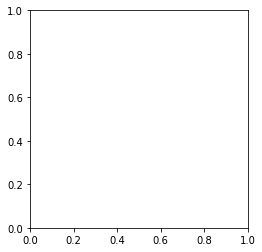

In [81]:
cm = metrics.multilabel_confusion_matrix(rel_true, rel_pred)
pl.imshow(cm)
pl.xlabel('pred')
pl.ylabel('true')
pl.colorbar()

In [82]:
cm

array([[[344589,     42],
        [    41,   4318]],

       [[348871,      0],
        [     2,    117]],

       [[348821,      1],
        [     7,    161]],

       [[340754,    157],
        [   188,   7891]],

       [[348011,     11],
        [    23,    945]],

       [[348017,      5],
        [     8,    960]],

       [[347135,     19],
        [    17,   1819]],

       [[347552,      4],
        [     9,   1425]],

       [[346010,     11],
        [    24,   2945]],

       [[346040,      9],
        [    14,   2927]],

       [[348987,      2],
        [     1,      0]],

       [[348983,      0],
        [     2,      5]],

       [[346573,      6],
        [     8,   2403]],

       [[348513,      1],
        [     1,    475]],

       [[346493,      3],
        [     3,   2491]],

       [[346513,      7],
        [    15,   2455]],

       [[348985,      1],
        [     1,      3]],

       [[348629,      4],
        [    14,    343]],

       [[346848,      4],
  

Text(0, 0.5, 'tpr')

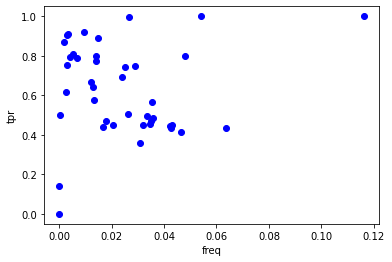

In [67]:
u, c = np.unique(rel_true, return_counts=True)
pl.plot(c / c.sum(), np.diag(cm), 'bo')
pl.xlabel('freq')
pl.ylabel('tpr')

In [71]:
diag = np.diag(cm)
list(zip(np.sort(diag), (idx2rel[idx] for idx in np.argsort(diag))))

[(0.0, 'ns:film.film.film_art_direction_by'),
 (0.14285714285714285, 'ns:film.film.cinematography'),
 (0.35660928873010717,
  'ns:film.film.produced_by|ns:film.film.production_companies'),
 (0.4159829838954725,
  'ns:people.person.spouse_s/ns:people.marriage.spouse|ns:fictional_universe.fictional_character.married_to/ns:fictional_universe.marriage_of_fictional_characters.spouses'),
 (0.4327760772309866, '!='),
 (0.43363086668586237, 'ns:film.director.film'),
 (0.4373239436619718,
  'ns:people.person.sibling_s/ns:people.sibling_relationship.sibling|ns:fictional_universe.fictional_character.siblings/ns:fictional_universe.sibling_relationship_of_fictional_characters.siblings'),
 (0.4458478903520559, 'ns:film.editor.film'),
 (0.44822485207100593, 'ns:film.writer.film'),
 (0.45097063215530114,
  'ns:film.producer.film|ns:film.production_company.films'),
 (0.45193798449612405, 'ns:film.cinematographer.film'),
 (0.45433893684688775, 'ns:film.film.directed_by'),
 (0.47023809523809523, 'ns:film